In [1]:
#!pip install openpyxl

In [2]:
import openpyxl

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel("Online Retail Data Set.xlsx")

In [5]:
df.shape

(541909, 8)

In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [11]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
df.shape

(406829, 8)

In [15]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [16]:
df["CustomerID"] = df["CustomerID"].astype("int")

In [17]:
#Removing rows where quantity is less than 1
df = df[~(df['Quantity'] < 1 )]

In [18]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397924.000000,397924,397924.000000,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.420210,NaN,22.096788,1713.169877


In [19]:
#Removing rows where Unitprice is below 0

df = df[~(df['UnitPrice'] < 0)]

In [20]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397924.000000,397924,397924.000000,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.420210,NaN,22.096788,1713.169877


In [21]:
# Removing duplicates

df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 397924, dtype: bool

In [22]:
df = df.drop_duplicates()

In [23]:
df.shape

(392732, 8)

In [25]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [26]:
#Creating Revenue column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [27]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue'],
      dtype='object')

In [28]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [29]:
df['DateOnly'] = df['InvoiceDate'].dt.date

In [30]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,DateOnly
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


In [33]:
df['Month'] = df['InvoiceDate'].dt.strftime('%B')

df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,DateOnly,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,December


<Axes: xlabel='Month', ylabel='Revenue'>

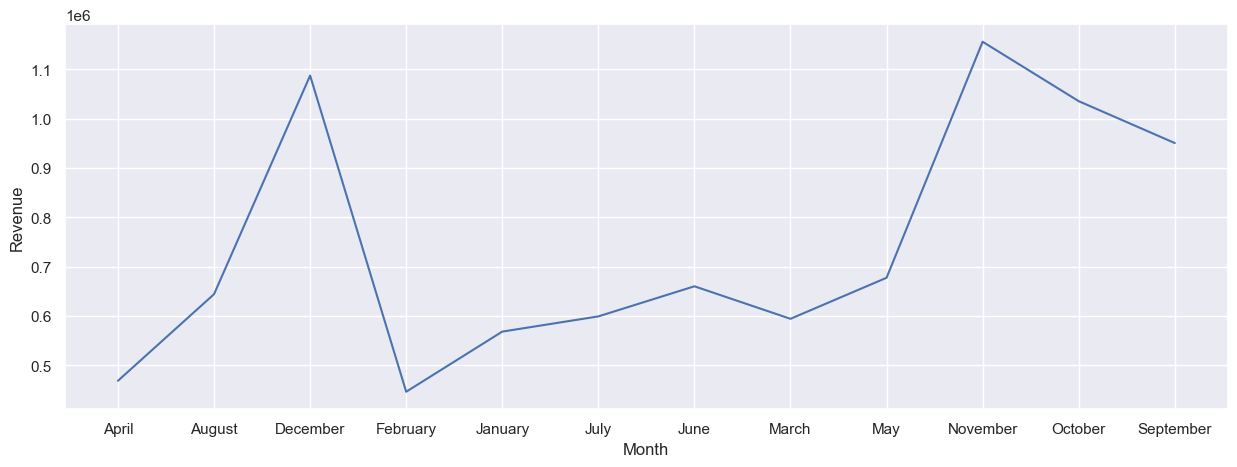

In [39]:
# Sum of Revenue VS Month
monthly_rev = df.groupby(['Month'], as_index=False)['Revenue'].sum()#.sort_values(by='Revenue', ascending=False)

sns.set(rc={'figure.figsize':(15,5)})

sns.lineplot(x = 'Month',y= 'Revenue' ,data = monthly_rev)

<Axes: xlabel='Month', ylabel='Revenue'>

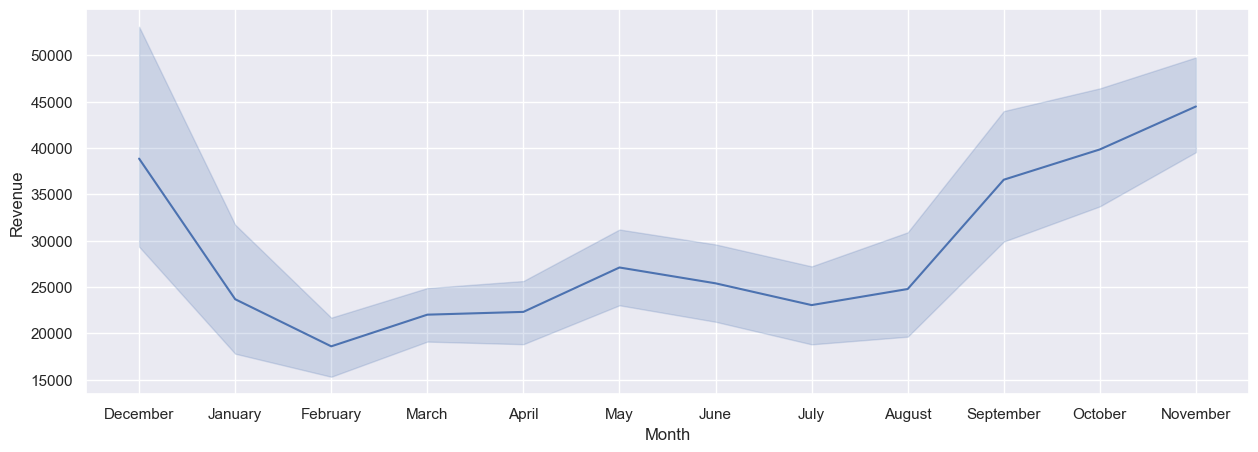

In [40]:
# Sum of Revenue VS Month
monthly_rev = df.groupby(['DateOnly', 'Month'], as_index=False)['Revenue'].sum()#.sort_values(by='Revenue', ascending=False)

sns.set(rc={'figure.figsize':(15,5)})

sns.lineplot(x = 'Month',y= 'Revenue' ,data = monthly_rev)

In [41]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,DateOnly,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,December


In [49]:
revenue_2011 = df[df['InvoiceDate'] > pd.to_datetime('2010-12-31')][['DateOnly', 'Month', 'Revenue']]

In [50]:
revenue_2011.shape

(367059, 3)

In [51]:
revenue_2011.head(5)

,DateOnly,Month,Revenue
42481,2011-01-04,January,19.5
42482,2011-01-04,January,10.5
42483,2011-01-04,January,10.5
42484,2011-01-04,January,10.5
42485,2011-01-04,January,12.5


In [72]:
revenue_2011['month_wise_revenue'] = revenue_2011.groupby('Month')['Revenue'].transform('sum')


In [73]:
revenue_2011.head(5)

,DateOnly,Month,Revenue,check,month_wise_revenue
42481,2011-01-04,January,19.5,"[[y, 0], [y, 0], [y, 0], [y, 0], [y, 0], [y, 0...",568101.31
42482,2011-01-04,January,10.5,"[[y, 0], [y, 0], [y, 0], [y, 0], [y, 0], [y, 0...",568101.31
42483,2011-01-04,January,10.5,"[[y, 0], [y, 0], [y, 0], [y, 0], [y, 0], [y, 0...",568101.31
42484,2011-01-04,January,10.5,"[[y, 0], [y, 0], [y, 0], [y, 0], [y, 0], [y, 0...",568101.31
42485,2011-01-04,January,12.5,"[[y, 0], [y, 0], [y, 0], [y, 0], [y, 0], [y, 0...",568101.31


In [74]:
revenue_2011.drop('check', axis=1, inplace=True)

In [75]:
revenue_2011.head(5)

,DateOnly,Month,Revenue,month_wise_revenue
42481,2011-01-04,January,19.5,568101.31
42482,2011-01-04,January,10.5,568101.31
42483,2011-01-04,January,10.5,568101.31
42484,2011-01-04,January,10.5,568101.31
42485,2011-01-04,January,12.5,568101.31


In [78]:
def assign_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        return 'Autumn'

revenue_2011['Season'] = revenue_2011['Month'].apply(assign_season)


In [79]:
revenue_2011.head(5)

,DateOnly,Month,Revenue,month_wise_revenue,Season
42481,2011-01-04,January,19.5,568101.31,Winter
42482,2011-01-04,January,10.5,568101.31,Winter
42483,2011-01-04,January,10.5,568101.31,Winter
42484,2011-01-04,January,10.5,568101.31,Winter
42485,2011-01-04,January,12.5,568101.31,Winter


In [80]:
revenue_2011['season_wise_revenue'] = revenue_2011.groupby('Season')['Revenue'].transform('sum')


In [81]:
revenue_2011.head(5)

,DateOnly,Month,Revenue,month_wise_revenue,Season,season_wise_revenue
42481,2011-01-04,January,19.5,568101.31,Winter,1531376.67
42482,2011-01-04,January,10.5,568101.31,Winter,1531376.67
42483,2011-01-04,January,10.5,568101.31,Winter,1531376.67
42484,2011-01-04,January,10.5,568101.31,Winter,1531376.67
42485,2011-01-04,January,12.5,568101.31,Winter,1531376.67


In [ ]:
revenue_2011.to_csv('revenue_2011.csv', index=False)

In [98]:
countries = df[['Country', 'Revenue', 'Quantity']][df['Country'] != 'United Kingdom']


In [93]:
countries.head(5)

,Country,Revenue,Quantity
26,France,90.0,24
27,France,90.0,24
28,France,45.0,12
29,France,10.2,12
30,France,15.6,24


In [ ]:
countries['sum-rev'] = countries.groupby('Country')['Revenue'].transform('sum')

countries['sum-qyt'] = countries.groupby('Country')['Quantity'].transform('sum')
# Sort in descending order
#top_countries = top_countries.sort_values('Revenue', ascending=False)

# Get top 10
#top_10_countries = top_countries.head(10)


In [108]:
countries.drop(['Revenue', 'Quantity'], axis=1, inplace=True)

In [109]:
countries.drop_duplicates(inplace=True)

In [110]:
countries

,Country,sum-rev,sum-qyt
26,France,208934.31,111429
197,Australia,138453.81,84199
385,Netherlands,285446.34,200937
1109,Germany,228678.40,119156
1236,Norway,36165.44,19338
1404,EIRE,265262.46,140383
5320,Switzerland,56443.95,30083
6421,Spain,61558.56,27944
6608,Poland,7334.65,3684
7134,Portugal,33375.84,16095


In [112]:
# Sort in descending order
top_countries = countries.sort_values(by='sum-rev', ascending=False)

# Get top 10
top_10_countries = top_countries.head(10)

In [113]:
top_10_countries

,Country,sum-rev,sum-qyt
385,Netherlands,285446.34,200937
1404,EIRE,265262.46,140383
1109,Germany,228678.40,119156
26,France,208934.31,111429
197,Australia,138453.81,84199
6421,Spain,61558.56,27944
5320,Switzerland,56443.95,30083
7279,Belgium,41196.34,23237
30079,Sweden,38367.83,36078
9783,Japan,37416.37,26016


In [114]:
top_10_countries.to_csv('top_10_countries.csv', index=False)

In [115]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,DateOnly,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,December


In [116]:
customer = df[['CustomerID', 'Country', 'Revenue']]

In [117]:
customer.head(5)

,CustomerID,Country,Revenue
0,17850,United Kingdom,15.30
1,17850,United Kingdom,20.34
2,17850,United Kingdom,22.00
3,17850,United Kingdom,20.34
4,17850,United Kingdom,20.34


In [118]:
customer['Revenue_per_customer'] = customer.groupby('CustomerID')['Revenue'].transform('sum')

C:\Users\User\AppData\Local\Temp\ipykernel_18728\1311168840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer['Revenue_per_customer'] = customer.groupby('CustomerID')['Revenue'].transform('sum')


In [119]:
customer.head(5)

,CustomerID,Country,Revenue,Revenue_per_customer
0,17850,United Kingdom,15.30,5391.21
1,17850,United Kingdom,20.34,5391.21
2,17850,United Kingdom,22.00,5391.21
3,17850,United Kingdom,20.34,5391.21
4,17850,United Kingdom,20.34,5391.21


In [120]:
customer.drop('Revenue', axis=1, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_18728\2140821794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer.drop('Revenue', axis=1, inplace=True)


In [122]:
customer.head(5)

,CustomerID,Country,Revenue_per_customer
0,17850,United Kingdom,5391.21
1,17850,United Kingdom,5391.21
2,17850,United Kingdom,5391.21
3,17850,United Kingdom,5391.21
4,17850,United Kingdom,5391.21


In [123]:
customer.drop_duplicates()

,CustomerID,Country,Revenue_per_customer
0,17850,United Kingdom,5391.21
9,13047,United Kingdom,3237.54
26,12583,France,7281.38
46,13748,United Kingdom,948.25
65,15100,United Kingdom,876.00
...,...,...,...
536969,13436,United Kingdom,196.89
537255,15520,United Kingdom,343.50
538064,13298,United Kingdom,360.00
538812,14569,United Kingdom,227.39


In [126]:
customer = customer.sort_values(by='Revenue_per_customer', ascending=False)

In [127]:
customer.head(5)

,CustomerID,Country,Revenue_per_customer
57447,14646,Netherlands,280206.02
204198,14646,Netherlands,280206.02
314742,14646,Netherlands,280206.02
314743,14646,Netherlands,280206.02
480940,14646,Netherlands,280206.02


In [128]:
customer = customer.reset_index(drop=True)

In [129]:
customer.head(5)

,CustomerID,Country,Revenue_per_customer
0,14646,Netherlands,280206.02
1,14646,Netherlands,280206.02
2,14646,Netherlands,280206.02
3,14646,Netherlands,280206.02
4,14646,Netherlands,280206.02


In [130]:
customer.duplicated()

0         False
1          True
2          True
3          True
4          True
          ...  
392727     True
392728    False
392729     True
392730    False
392731    False
Length: 392732, dtype: bool

In [132]:
customer.drop_duplicates(inplace=True)

In [133]:
customer.head(5)

,CustomerID,Country,Revenue_per_customer
0,14646,Netherlands,280206.02
2080,18102,United Kingdom,259657.30
2511,17450,United Kingdom,194390.79
2847,16446,United Kingdom,168472.50
2850,14911,EIRE,143711.17


In [134]:
top_10_customer = customer.head(10)

In [135]:
top_10_customer

,CustomerID,Country,Revenue_per_customer
0,14646,Netherlands,280206.02
2080,18102,United Kingdom,259657.30
2511,17450,United Kingdom,194390.79
2847,16446,United Kingdom,168472.50
2850,14911,EIRE,143711.17
8522,12415,Australia,124914.53
9238,14156,EIRE,117210.08
10633,17511,United Kingdom,91062.38
11596,16029,United Kingdom,80850.84
11837,12346,United Kingdom,77183.60


In [137]:
top_10_customer.dtypes

CustomerID                int32
Country                  object
Revenue_per_customer    float64
dtype: object

In [140]:
top_10_customer['CustomerID'] = top_10_customer['CustomerID'].astype('str')

C:\Users\User\AppData\Local\Temp\ipykernel_18728\2001597379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_customer['CustomerID'] = top_10_customer['CustomerID'].astype('str')


In [141]:
top_10_customer.dtypes

CustomerID               object
Country                  object
Revenue_per_customer    float64
dtype: object

In [142]:
top_10_customer.to_csv('top_10_customer.csv', index=False)

In [143]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue', 'DateOnly', 'Month'],
      dtype='object')

In [144]:
demand = df[['Country', 'StockCode', 'Quantity']][df['Country'] != 'United Kingdom']

In [145]:
demand

,Country,StockCode,Quantity
26,France,22728,24
27,France,22727,24
28,France,22726,12
29,France,21724,12
30,France,21883,24
...,...,...,...
541904,France,22613,12
541905,France,22899,6
541906,France,23254,4
541907,France,23255,4


In [146]:
demand['product_demand'] = demand.groupby(['Country','StockCode'])['Quantity'].transform('sum')

In [147]:
demand.head(5)

,Country,StockCode,Quantity,product_demand
26,France,22728,24,362
27,France,22727,24,316
28,France,22726,12,340
29,France,21724,12,36
30,France,21883,24,312


In [148]:
demand = demand.sort_values(by='product_demand', ascending=False)

In [150]:
demand.head(20)

,Country,StockCode,Quantity,product_demand
421601,Netherlands,23084,2400,4801
232765,Netherlands,23084,1,4801
534952,Netherlands,23084,1440,4801
314749,Netherlands,23084,480,4801
205681,Netherlands,23084,240,4801
434705,Netherlands,23084,216,4801
186763,Netherlands,23084,24,4801
295425,Netherlands,22629,128,4528
66063,Netherlands,22629,64,4528
84387,Netherlands,22629,64,4528


In [151]:
demand.drop('Quantity', axis=1, inplace=True)

In [152]:
demand.drop_duplicates()

,Country,StockCode,product_demand
421601,Netherlands,23084,4801
295425,Netherlands,22629,4528
242079,Netherlands,22630,4132
347159,Netherlands,21212,4128
423711,France,23084,4000
...,...,...,...
291891,Italy,22605,1
188245,Portugal,20754,1
291896,Italy,23008,1
280847,Belgium,22838,1


In [156]:
demand.drop('StockCode', axis=1, inplace=True)

In [157]:
demand.head(5)

,Country,product_demand
421601,Netherlands,4801
232765,Netherlands,4801
534952,Netherlands,4801
314749,Netherlands,4801
205681,Netherlands,4801


In [159]:
demand['prod_demand'] = demand.groupby('Country')['product_demand'].transform('sum')

In [160]:
demand.head(5)

,Country,product_demand,prod_demand
421601,Netherlands,4801,1442270
232765,Netherlands,4801,1442270
534952,Netherlands,4801,1442270
314749,Netherlands,4801,1442270
205681,Netherlands,4801,1442270


In [161]:
demand.drop('product_demand', axis=1, inplace=True)

In [164]:
demand.drop_duplicates(inplace=True)

In [166]:
demand

,Country,prod_demand
421601,Netherlands,1442270
423711,France,2550660
475865,Japan,62733
269640,Australia,252391
400561,Sweden,111404
119021,EIRE,1381734
396448,Germany,2268947
248802,Spain,128900
63032,Switzerland,122037
421971,Norway,53996


In [165]:
demand.to_csv('demand.csv', index=False)